In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from nltk.corpus import stopwords

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')

df['target'] = df.is_there_an_emotion_directed_at_a_brand_or_product

unique_emotions = df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().index

for emotion in unique_emotions:
    if emotion == "Positive emotion":
        df.target.replace(to_replace=emotion, value=1, inplace=True)
    elif emotion == "Negative emotion":
        df.target.replace(to_replace=emotion, value=2, inplace=True)
    else:
        df.target.replace(to_replace=emotion, value=0, inplace=True)

In [3]:
df = df[df.tweet_text.notnull()]
df.tweet_text.dropna(inplace=True)
df.tweet_text = df.tweet_text.map(str)

In [4]:
X = df.tweet_text
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [5]:
bestmodelfromgrid2 = Pipeline([('countvec', CountVectorizer(ngram_range=(1, 2))), 
                              ('mnnb', MultinomialNB())] ,  verbose = True)

In [6]:
bestmodelfromgrid2.fit(X_train, y_train)

[Pipeline] .......... (step 1 of 2) Processing countvec, total=   0.3s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


Pipeline(steps=[('countvec', CountVectorizer(ngram_range=(1, 2))),
                ('mnnb', MultinomialNB())],
         verbose=True)

In [10]:
y_pred = bestmodelfromgrid2.predict(X_test)

In [13]:
report = classification_report(y_true = y_test, y_pred = y_pred )

In [16]:
print(report)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1359
           1       0.60      0.48      0.53       763
           2       0.78      0.14      0.24       151

    accuracy                           0.67      2273
   macro avg       0.69      0.48      0.51      2273
weighted avg       0.67      0.67      0.65      2273



In [19]:
conmat = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [20]:
conmat

array([[1138,  216,    5],
       [ 397,  365,    1],
       [ 100,   30,   21]], dtype=int64)

In [23]:
disp = ConfusionMatrixDisplay(conmat, display_labels = ['Neutral','Positive','Negative'])

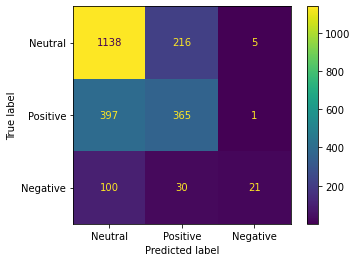

In [24]:
disp.plot()